In [43]:
import pandas as pd
import datetime
import time
from konlpy.tag import Okt
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
import nltk

import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [33]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [10]:
news = pd.read_csv("./CSV/05_news_title.csv")
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952789 entries, 0 to 1952788
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   제목      object
dtypes: object(2)
memory usage: 29.8+ MB


In [11]:
news["날짜"] = pd.to_datetime(news["날짜"], format = "%Y-%m-%d")

In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952789 entries, 0 to 1952788
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   제목      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 29.8+ MB


In [15]:
df_top100 = news.groupby("날짜").head(100)

In [21]:
df_top100.head(10)

,날짜,제목
0,2020-01-21,"[사설] 중국발 '우한 폐렴' 공포, 우리나라도 안전지대 아니다"
1,2020-01-21,춘절 기간 中관광객 13만명 오는데 ‘우한 폐렴’ 공항 방역 비상
2,2020-01-21,우한 폐렴 1명이 14명 감염 사스급 전염병 우려
3,2020-01-21,中 ‘우한 폐렴’ 정보 제공 인색 정부 “우리도 뉴스로 파악”
4,2020-01-21,하루 중국발 항공기로 3만명 입국하는데 질본 “다 볼 수 없다”
5,2020-01-21,"‘우한 폐렴’ 사망 4명 이어 16명도 위중, 감염자 총 224명"
6,2020-01-21,호주서도 우한폐렴 의심환자 발생 당국 검역 강화
7,2020-01-21,"의료진 감염, 사람 간 전염 中 폐렴 마지노선 뚫렸다"
8,2020-01-21,사람끼리 전염된다고? 설 명절 앞두고 커지는‘우한 폐렴’ 공포 [영상]
9,2020-01-21,"‘우한 폐렴’ 4번째 사망자 WHO 긴급위, 시진핑 긴급지시"


In [17]:
df_top100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59000 entries, 0 to 1950026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      59000 non-null  datetime64[ns]
 1   제목      59000 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [19]:
start = time.time()

title = ""
for idx, val in enumerate(df_top100["제목"]) :
    title = title + val + " "
    if idx % 10000 == 0 :
        print(idx, val)

print("title length :", len(title))
print("소요시간 :", time.time() - start)

0 [사설] 중국발 '우한 폐렴' 공포, 우리나라도 안전지대 아니다
10000 [기고] 전두환, 그는 왜 반성할 줄도 모를까?
20000 태안고, 비대면 학생회장 선거를 해요!
30000 '전 차' 끌고 '화 선' 밀고 코스피 단숨에 2500 돌파
40000 영주시, 코로나19에 관심 높아진 ‘풍기홍삼’ 신뢰도 높인다
50000 전북도, 코로나19 사망자 위로금 및 장례비 지원
title length : 1819032
소요시간 : 16.29871416091919


In [20]:
title[:100]

"[사설] 중국발 '우한 폐렴' 공포, 우리나라도 안전지대 아니다 춘절 기간 中관광객 13만명 오는데 ‘우한 폐렴’ 공항 방역 비상 우한 폐렴 1명이 14명 감염 사스급 전염병 우려"

In [23]:
t = Okt()
doc_nouns = t.nouns(title)
print(len(doc_nouns))

454096


In [25]:
ko = nltk.Text(doc_nouns, name = "코로나 키워드 뉴스 제목")

In [26]:
print(len(ko.tokens), type(ko.tokens))
print(ko.tokens[0 : 30])
print(ko.vocab().most_common(20))

454096 <class 'list'>
['사설', '중국', '발', '우한', '폐렴', '공포', '우리나라', '안전지대', '춘절', '기간', '관광객', '우한', '폐렴', '공항', '방역', '비상', '우한', '폐렴', '명', '명', '감염', '사스', '전염병', '우려', '우한', '폐렴', '정보', '제공', '인색', '정부']
[('코로나', 12861), ('명', 6923), ('확진', 3430), ('확', 2725), ('진자', 2692), ('백신', 2415), ('지역', 2032), ('감염', 1994), ('지원', 1952), ('방역', 1826), ('확산', 1511), ('신규', 1493), ('대전', 1466), ('접종', 1396), ('대구', 1356), ('사설', 1335), ('등', 1335), ('개최', 1203), ('운영', 1187), ('추가', 1176)]


In [27]:
most_fre = ko.vocab().most_common(50)
most_fre

[('코로나', 12861),
 ('명', 6923),
 ('확진', 3430),
 ('확', 2725),
 ('진자', 2692),
 ('백신', 2415),
 ('지역', 2032),
 ('감염', 1994),
 ('지원', 1952),
 ('방역', 1826),
 ('확산', 1511),
 ('신규', 1493),
 ('대전', 1466),
 ('접종', 1396),
 ('대구', 1356),
 ('사설', 1335),
 ('등', 1335),
 ('개최', 1203),
 ('운영', 1187),
 ('추가', 1176),
 ('마스크', 1162),
 ('제', 1158),
 ('한국', 1146),
 ('위', 1128),
 ('차', 1110),
 ('신종', 1098),
 ('회', 1079),
 ('대통령', 1058),
 ('경북', 1031),
 ('정부', 1019),
 ('사업', 1001),
 ('첫', 983),
 ('센터', 967),
 ('온라인', 958),
 ('중', 938),
 ('거리', 929),
 ('뉴스', 916),
 ('포토', 912),
 ('발생', 907),
 ('교육', 901),
 ('사회', 895),
 ('속보', 886),
 ('극복', 870),
 ('사랑', 859),
 ('우한', 833),
 ('두기', 817),
 ('경제', 807),
 ('광주', 803),
 ('병원', 794),
 ('세', 787)]

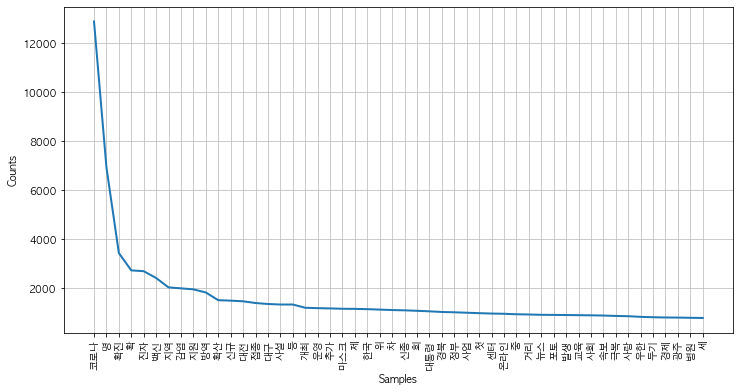

In [34]:
plt.figure(figsize = (12, 6))
ko.plot(50)
plt.show()

In [38]:
stopwords = ["코로나", "확", "진자", "세", "중", "차", "회", "위", "등", "더", "제"]

new_ko = []
for one_word in ko :
    if one_word not in stopwords :
        new_ko.append(one_word)

In [39]:
len(new_ko)

427568

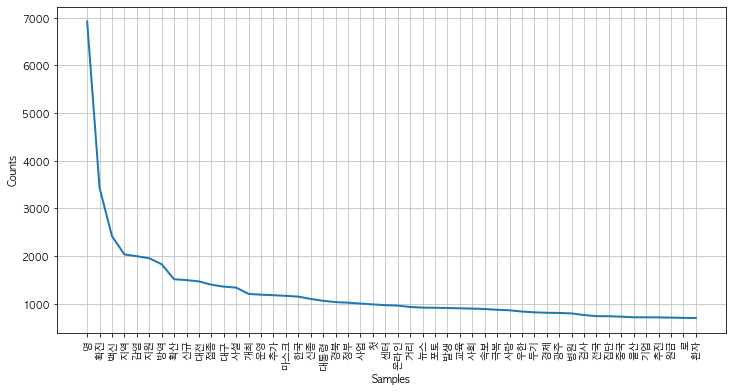

In [40]:
new_ko = nltk.Text(new_ko, name = "코로나 키워드 뉴스 제목2")
plt.figure(figsize = (12, 6))
new_ko.plot(50)

### 텍스트의 단어 분포 확인(dispersion_plot)

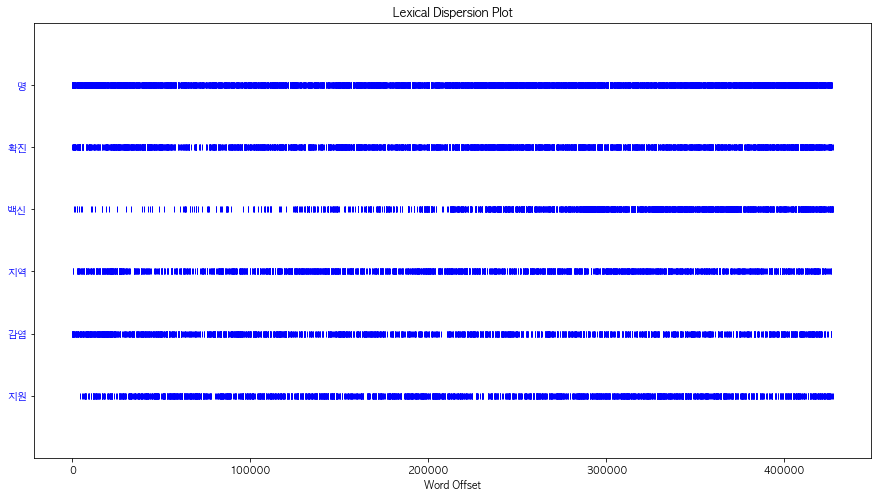

In [41]:
plt.figure(figsize = (15, 8))
new_ko.dispersion_plot(["명", "확진", "백신", "지역", "감염", "지원"])

In [52]:
path

'C:/Windows/Fonts/malgun.ttf'

In [72]:
cloud_mask = np.array(Image.open("./PNG/cloud_icon6.png"))

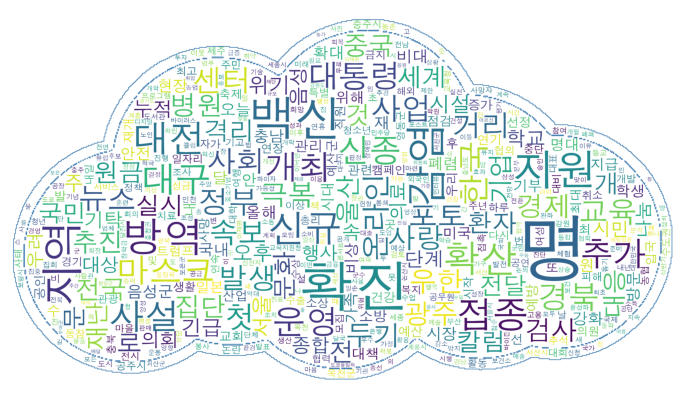

In [77]:
data = new_ko.vocab().most_common(1000)

wc = WordCloud(background_color = "white", 
               max_words = 500,
               mask = cloud_mask,
               font_path = '/Library/Fonts/AppleGothic.ttf',
               contour_width = 2,
               contour_color = "steelblue",
               max_font_size = 300).generate_from_frequencies(dict(data))

plt.figure(figsize = (12, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

'C:/Windows/Fonts/malgun.ttf'